# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [1]:
#Import all the necessary modules
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.stats import zscore
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [3]:
colnames = ['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age', 'class']
prima_df = pd.read_csv("prima-indians-diabetes-ensemble-class.data",names=colnames)

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [4]:
prima_df.head(10)

,preg,glu,bp,sft,ins,bmi,dpf,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [5]:
print(prima_df.info())
print("Shape of data is : ",prima_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
glu      768 non-null int64
bp       768 non-null int64
sft      768 non-null int64
ins      768 non-null int64
bmi      768 non-null float64
dpf      768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
Shape of data is :  (768, 9)


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [6]:
mean_preg = prima_df.loc[:,"preg"].median()
print (mean_preg)
mean_glu = prima_df.loc[:,"glu"].median()
print (mean_glu)
mean_bp = prima_df.loc[:,"bp"].median()
print (mean_bp)
mean_sft = prima_df.loc[:,"sft"].median()
print (mean_sft)
mean_ins = prima_df.loc[:,"ins"].median()
print (mean_ins)
mean_bmi = prima_df.loc[:,"bmi"].median()
print (mean_bmi)
mean_dpf = prima_df.loc[:,"dpf"].median()
print (mean_dpf)
mean_age = prima_df.loc[:,"age"].median()
print (mean_age)

3.0
117.0
72.0
23.0
30.5
32.0
0.3725
29.0


In [7]:
prima_df=prima_df.replace({'preg': {0: mean_preg}})
prima_df=prima_df.replace({'glu': {0: mean_glu}})
prima_df=prima_df.replace({'bp': {0: mean_bp}})
prima_df=prima_df.replace({'sft': {0: mean_sft}})
prima_df=prima_df.replace({'ins': {0: mean_ins}})
prima_df=prima_df.replace({'bmi': {0: mean_bmi}})
prima_df=prima_df.replace({'dpf': {0: mean_dpf}})
prima_df=prima_df.replace({'age': {0: mean_age}})
prima_df

,preg,glu,bp,sft,ins,bmi,dpf,age,class
0,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,30.5,26.6,0.351,31,0
2,8.0,183.0,64.0,23.0,30.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,3.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5.0,116.0,74.0,23.0,30.5,25.6,0.201,30,0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10.0,115.0,72.0,23.0,30.5,35.3,0.134,29,0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8.0,125.0,96.0,23.0,30.5,32.0,0.232,54,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [8]:
prima_df.describe()

,preg,glu,bp,sft,ins,bmi,dpf,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.021516,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

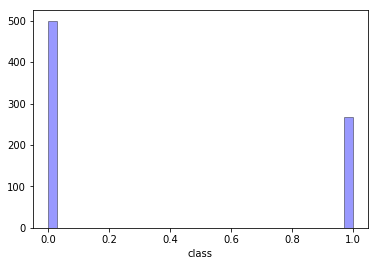

In [20]:
sns.distplot(prima_df['class'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


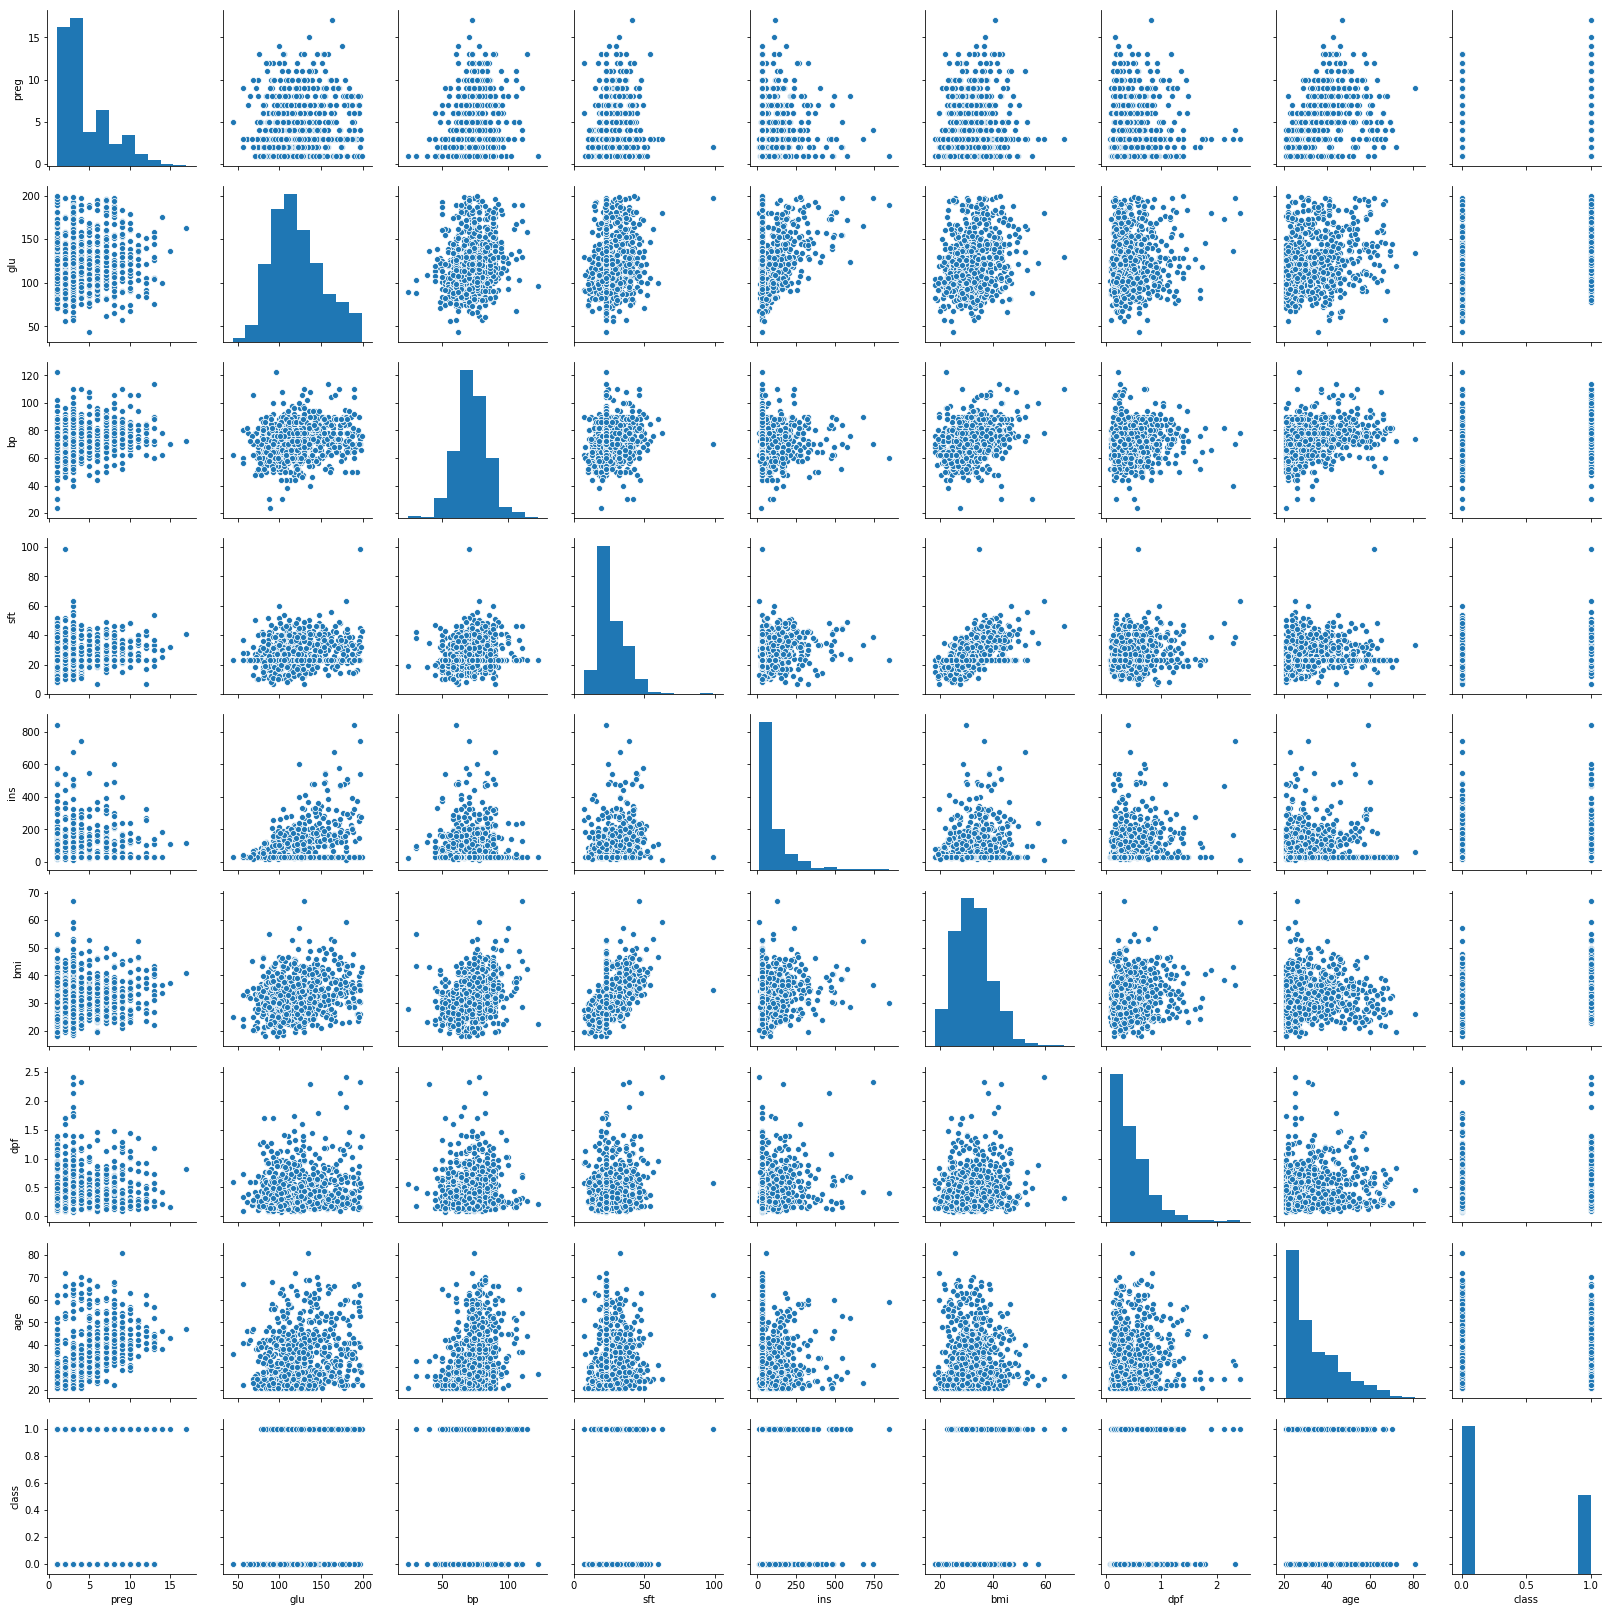

In [9]:
sns.pairplot(prima_df)

Using the plot - infer the relationship between different variables

In [10]:
# Age doesnt seem to have any relationship with outcome i.e getting diabetes.
# ins and age have right skewed wth long tail
# glu, fst, dpf,bmi seem to have normal distribution.

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [11]:
X=prima_df[['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age']]
Y=prima_df['class']
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=0)

In [12]:
Xtrain=np.array(xtrain)
Ytrain=np.array(ytrain)

In [13]:
Xtest=np.array(xtest)
Ytest=np.array(ytest)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [14]:
model=DecisionTreeClassifier(max_depth=4,criterion='entropy',random_state=0)
model.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [15]:
ypred=model.predict(Xtest)
acc=metrics.accuracy_score(Ytest,ypred)
print("Accurance is : ",acc)
cm=metrics.confusion_matrix(Ytest,ypred)
print("Confusion matrix : \n",cm)

Accurance is :  0.7445887445887446
Confusion matrix : 
 [[127  30]
 [ 29  45]]


Print the feature importance of the decision model - Optional

# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [16]:
Rf_model = RandomForestClassifier(n_estimators=51,criterion='entropy',random_state=0 )
Rf_model.fit(Xtrain,Ytrain)
Rf_pred = Rf_model.predict(Xtest)
Rf_acc = metrics.accuracy_score(Ytest,Rf_pred)
print("Accurancy of Randon Forest : ",Rf_acc)

Accurancy of Randon Forest :  0.7619047619047619


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [17]:
boost_dt = AdaBoostClassifier(n_estimators=50,random_state=2)
boost_dt.fit(Xtrain,Ytrain)
boost_pred = boost_dt.predict(Xtest)
boost_acc = metrics.accuracy_score(Ytest,boost_pred)
print("Accurancy of Adaboostwithout base estimator : ",boost_acc)

Accurancy of Adaboostwithout base estimator :  0.7402597402597403


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [18]:
bag_dt=BaggingClassifier(n_estimators=15,random_state=2)
bag_dt.fit(Xtrain,Ytrain)
bag_pred = bag_dt.predict(Xtest)
bag_acc = metrics.accuracy_score(Ytest,bag_pred)
print("Accurancy of Bagging without base estimator : ",bag_acc)

Accurancy of Bagging without base estimator :  0.8008658008658008


# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [19]:
gb_model=GradientBoostingClassifier(n_estimators=50,random_state=2)
gb_model.fit(Xtrain,Ytrain)
gb_pred = gb_model.predict(Xtest)
gb_acc = metrics.accuracy_score(Ytest,gb_pred)
print("Accurancy of Gradientboost classifier : ",gb_acc)

Accurancy of Gradientboost classifier :  0.7878787878787878


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.